# Yulu : Hypothesis Testing

#### Colab Notebook Link:

https://colab.research.google.com/drive/1PNuftQ90sMWoOwTGmfGlQTVbLZihdgxp?usp=sharing

## Business Problem
Yulu, India’s leading micro-mobility service provider, offers shared electric cycles to make first- and last-mile commutes affordable and sustainable. Recently, Yulu has experienced a noticeable decline in its revenues and rental demand.  

The company aims to understand the **factors influencing the demand** for its shared electric cycles in the Indian market. Demand can be impacted by multiple variables such as **season, weather, working days, holidays, and temperature conditions**. Identifying these drivers is essential for optimizing **fleet availability, pricing, and marketing strategies**.

## Project Goal
The goal of this project is to:
1. Identify the **key factors that significantly affect the number of cycles rented**.  
2. Validate the statistical significance of these factors using **hypothesis testing**.  
3. Derive **data-backed insights** to support operational and marketing decisions.  

### Statistical Tests to be Conducted:
- **Two-Sample T-Test:**  
  To test whether the number of rentals differs between **working days and non-working days**.  

- **ANOVA:**  
  To test whether the number of rentals significantly differs across **seasons** and **weather conditions**.  

- **Chi-Square Test:**  
  To test whether **weather conditions are dependent on seasons**.

## Business Value
The results of this analysis will help Yulu:
- **Optimize fleet allocation:** Increase or reduce cycle deployment based on expected demand during specific seasons or weather conditions.  
- **Enhance marketing strategy:** Launch targeted campaigns for working-day commuters or during peak seasons.  
- **Plan maintenance & charging operations:** Schedule servicing during low-demand periods (e.g., rainy or off-season days).  
- **Improve operational efficiency and customer satisfaction:** By aligning supply with predicted demand patterns.

## Phase 1 — Setup & EDA

### Import Required Libraries

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

### Set Visual Style

In [102]:
# Chart Style settings
sns.set(style='whitegrid', palette='muted',font_scale=1.0)

### Load and Exlpare Dataset

In [103]:
# Load dataset
df = pd.read_csv('bike_sharing.txt', parse_dates=['datetime'])

In [5]:
df.shape

(10886, 12)

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [104]:
# Rename count column for readability in the visualizations
df = df.rename(columns={'count': 'total_rentals'})
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [105]:
# Quick structure & summary
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       10886 non-null  datetime64[ns]
 1   season         10886 non-null  int64         
 2   holiday        10886 non-null  int64         
 3   workingday     10886 non-null  int64         
 4   weather        10886 non-null  int64         
 5   temp           10886 non-null  float64       
 6   atemp          10886 non-null  float64       
 7   humidity       10886 non-null  int64         
 8   windspeed      10886 non-null  float64       
 9   casual         10886 non-null  int64         
 10  registered     10886 non-null  int64         
 11  total_rentals  10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
season,10886.0,2.506614,1.0,2.0,3.0,4.0,4.0,1.116174
holiday,10886.0,0.028569,0.0,0.0,0.0,0.0,1.0,0.166599
workingday,10886.0,0.680875,0.0,0.0,1.0,1.0,1.0,0.466159
weather,10886.0,1.418427,1.0,1.0,1.0,2.0,4.0,0.633839
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477


In [106]:
# Convert appropriate columns to categorical
cat_cols = ['season','holiday','workingday','weather']
for c in cat_cols:
    df[c] = df[c].astype('category')

In [107]:
# Check missing values
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [108]:
# Basic Value Counts
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for season:
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

Value counts for holiday:
holiday
0    10575
1      311
Name: count, dtype: int64

Value counts for workingday:
workingday
1    7412
0    3474
Name: count, dtype: int64

Value counts for weather:
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


### Check Outliers

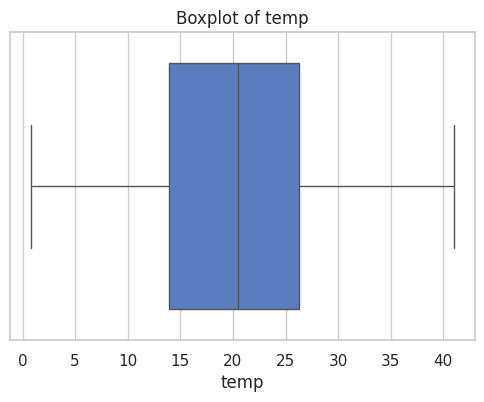

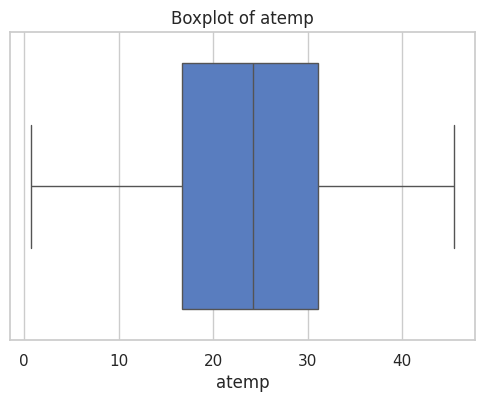

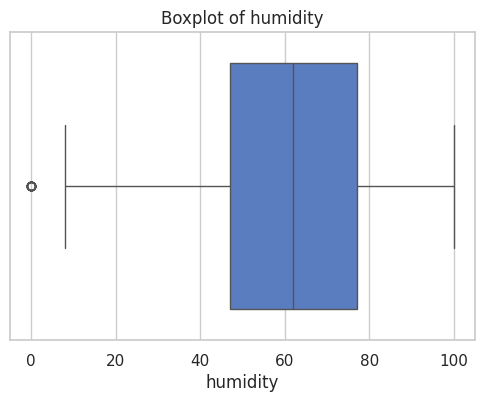

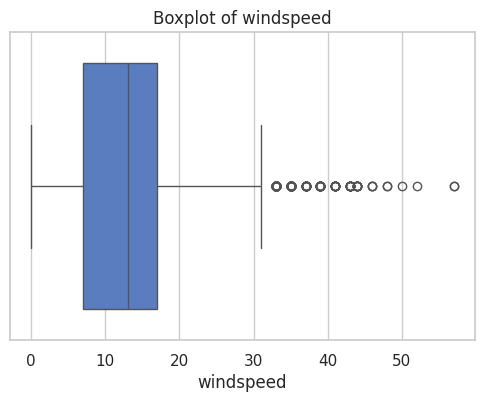

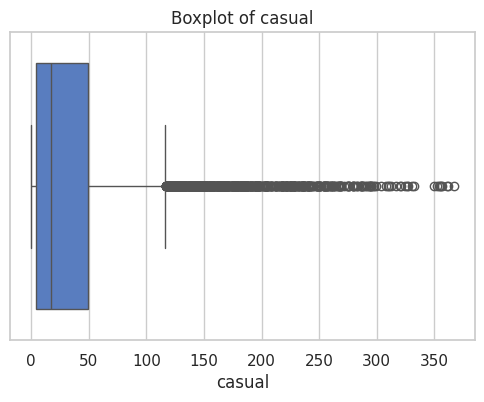

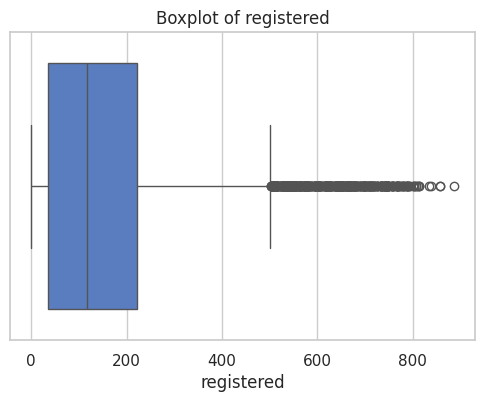

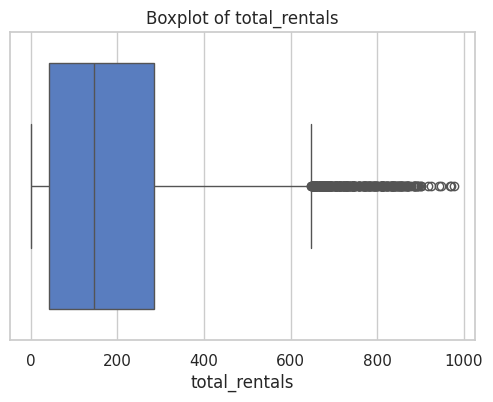

In [109]:
# Boxplot to visulaize outliers

for col in ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_rentals']:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()



## Phase 1: Summary & Business Takeaway

### Summary

- Dataset contains 10,886 records with 12 columns, representing hourly bike rental data — sufficient for robust statistical and inferential analysis.
- No missing values or incorrect data types, ensuring smooth data preprocessing.
- Numerical columns show varying ranges — e.g., temperature (0.82°C–41°C), humidity (0–100%), windspeed (0–56.9).
- Rental counts are right-skewed, with mean (191.6) > median (145), indicating most rentals are moderate with occasional spikes.
- Seasonal data is balanced across all four seasons, allowing fair seasonal trend comparison.
- Only ~3% holidays and ~68% working days, suggesting weekday vs weekend/holiday analysis will be meaningful.
- Majority of weather conditions are clear to moderate (weather=1 or 2) — extreme weather is rare (only 1 instance of weather=4).

### Business Takeaway

- The clean and balanced dataset enables strong statistical testing and regression analysis for predicting demand patterns.
- Rental demand shows strong weekday and seasonal structure — likely influenced by weather and temperature.
- Clear skew in rental counts implies occasional demand spikes — possibly during ideal weather or weekends.
- Business can use these insights to optimize bike availability, schedule maintenance, and plan promotions around favorable weather and working-day trends.

## Phase 2: Univariate and Bivariate Analysis

### Univariate Analysis

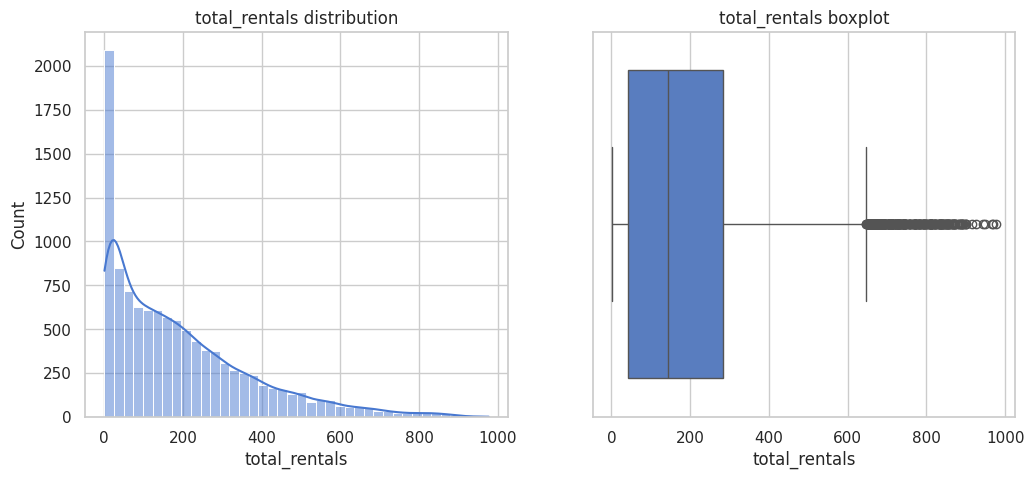

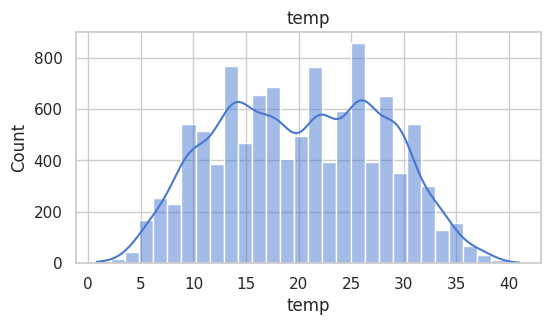

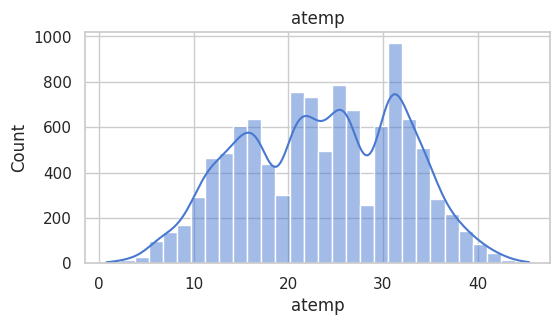

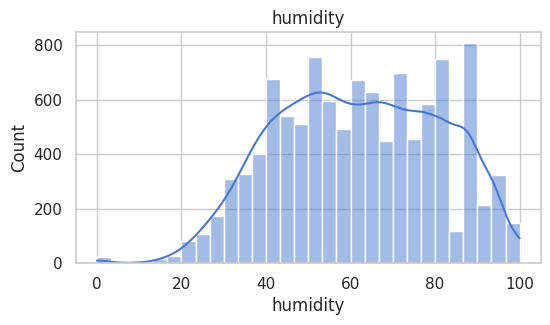

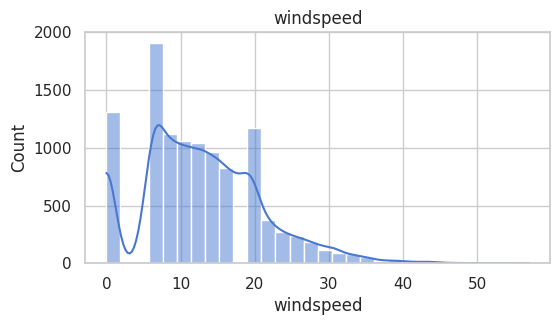

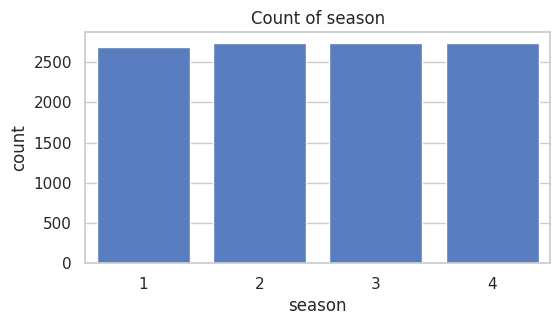

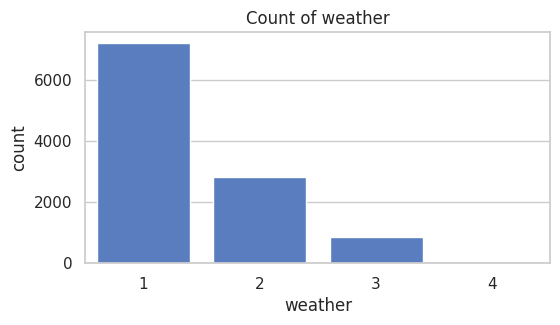

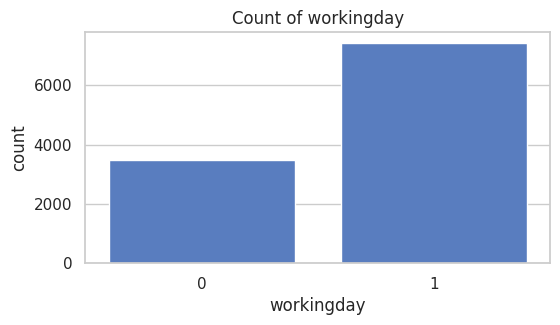

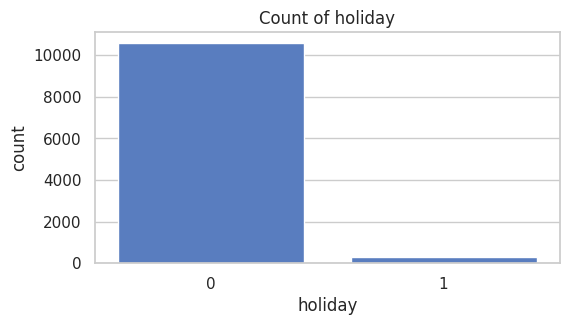

In [110]:
# Univariate visualizations
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['total_rentals'], bins=40, kde=True)
plt.title('total_rentals distribution')
plt.subplot(1,2,2)
sns.boxplot(x=df['total_rentals'])
plt.title('total_rentals boxplot')
plt.show()

# Continuous features
for col in ['temp','atemp','humidity','windspeed']:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
    plt.show()

# Categorical distributions
for c in ['season','weather','workingday','holiday']:
    plt.figure(figsize=(6,3))
    sns.countplot(x=c, data=df, order=sorted(df[c].unique()))
    plt.title(f'Count of {c}')
    plt.show()


### Bivariate Analysis

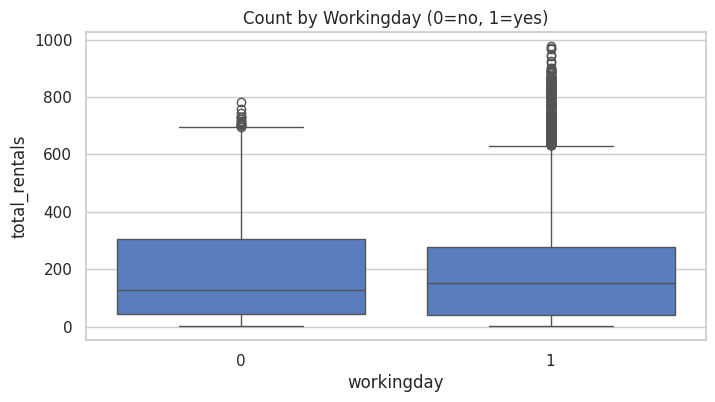

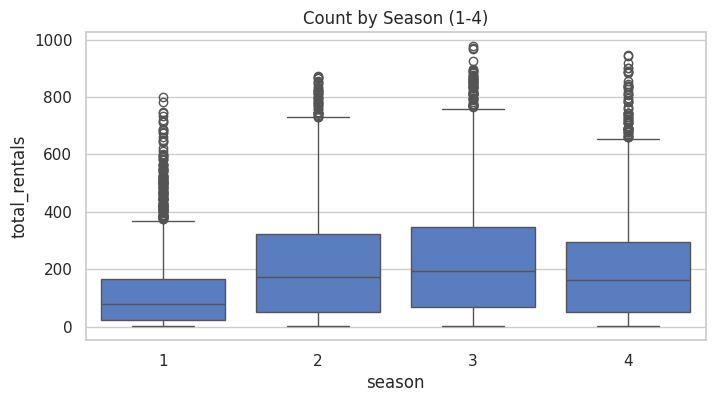

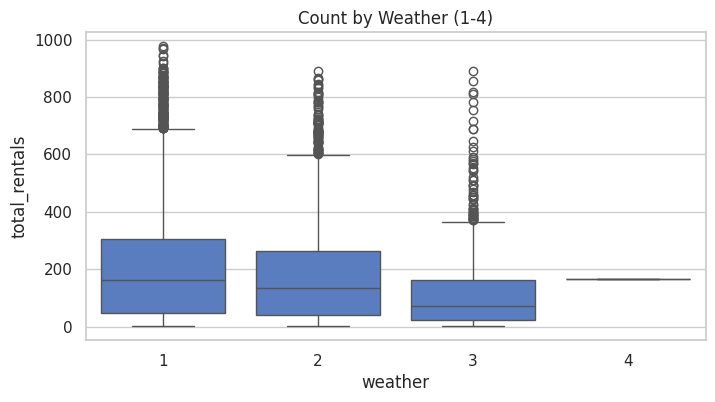

In [111]:
# Bivariate: count vs workingday, season, weather
plt.figure(figsize=(8,4))
sns.boxplot(x='workingday', y='total_rentals', data=df)
plt.title('Count by Workingday (0=no, 1=yes)')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='season', y='total_rentals', data=df)
plt.title('Count by Season (1-4)')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='weather', y='total_rentals', data=df)
plt.title('Count by Weather (1-4)')
plt.show()


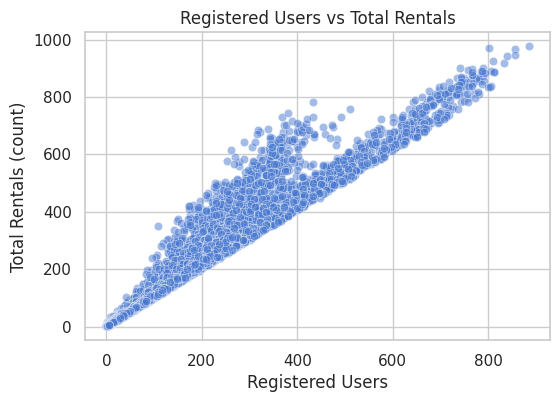

Correlation between registered users and total rentals: 0.97


In [113]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='registered', y='total_rentals', alpha=0.5)
plt.title("Registered Users vs Total Rentals")
plt.xlabel("Registered Users")
plt.ylabel("Total Rentals (count)")
plt.show()

corr = df['registered'].corr(df['total_rentals'])
print(f"Correlation between registered users and total rentals: {corr:.2f}")


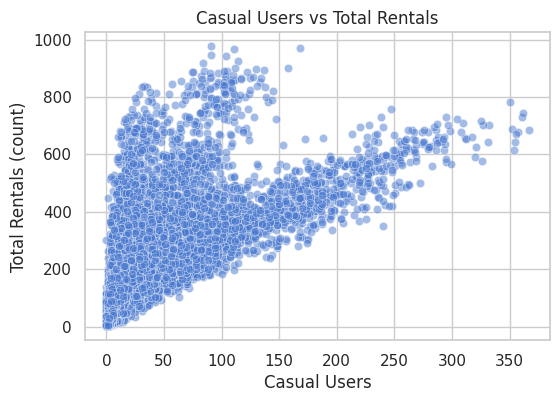

Correlation between causal users and total rentals: 0.69


In [114]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='casual', y='total_rentals', alpha=0.5)
plt.title("Casual Users vs Total Rentals")
plt.xlabel("Casual Users")
plt.ylabel("Total Rentals (count)")
plt.show()

corr = df['casual'].corr(df['total_rentals'])
print(f"Correlation between causal users and total rentals: {corr:.2f}")

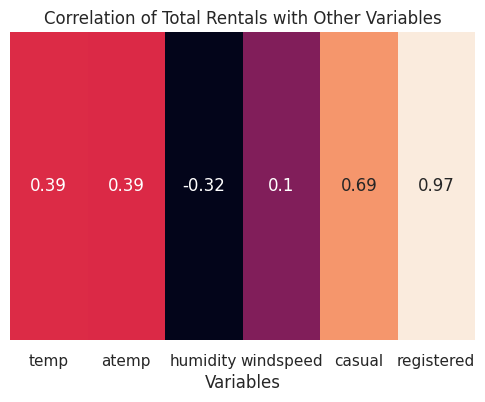

In [115]:
# Numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

correlations = corr_matrix['total_rentals'].drop('total_rentals')

plt.figure(figsize=(6, 4))
sns.heatmap(correlations.to_frame().T, annot=True,cbar=False)
plt.title('Correlation of Total Rentals with Other Variables')
plt.xlabel('Variables')
plt.yticks([])
plt.show()



## Phase 2: Univariate & Bivariate Analysis Summary

### Summary
- Demand (total rental count) shows a right-skewed distribution, meaning most hours have moderate rental activity, while a few peak hours record extremely high demand — typical of commute or weekend surges.
- Casual vs Registered Users: Registered users dominate total rentals, indicating a loyal customer base. Casual rides rise sharply on non-working days, pointing to leisure-driven usage.
- A strong positive correlation between registered users and total rentals suggests that Yulu’s revenue stream is heavily dependent on its repeat (registered) riders.
- Casual user contribution is smaller and more variable, influenced by weekends and weather.
- Seasonal Patterns: Demand is higher during summer and fall (season 2 & 3), suggesting favorable weather and commuting conditions boost rentals. Winter months (season 4) show lower usage due to colder temperatures.
- Weather Conditions: Rentals are highest under clear or partly cloudy weather (weather = 1) and drop significantly under mist or rain (weather = 2 & 3). Severe weather (weather = 4) nearly halts usage.
- Working Day Effect: Average rentals are lower on working days compared to weekends/non-working days, implying users prefer Yulu bikes more for leisure than daily office commutes.
- Temperature (temp, atemp) shows a positive correlation with rentals — as temperature increases up to a comfort level, rentals increase. Beyond a threshold, demand starts to flatten.
- Humidity and Windspeed have weak negative correlations with demand, indicating slightly reduced ride preference in humid or windy conditions.
- No missing values or incorrect datatypes were found, and categorical variables are well balanced across seasons and working days.

### Business Takeaways

- Weather & Season strongly drive demand: Clear weather and moderate temperatures significantly boost ride counts. Yulu can optimize bike availability and maintenance scheduling around favorable weather conditions.
- Working day vs weekend usage differs: Leisure rides dominate on weekends, suggesting Yulu should target weekend promotions, bundle plans, or family rides to capture casual demand.
- High dependence on registered users: Retaining and growing this loyal base is critical — loyalty benefits, referral discounts, or gamified ride tracking can sustain long-term engagement.
- The business should invest in retaining and expanding the registered user base, while also designing incentives for casual users to convert into registered riders.
- Weather-based dynamic pricing: During low-demand weather (rainy/misty), offering price discounts or free ride minutes could stabilize overall usage.
- Operational Insight: Demand peaks during specific hours and seasons — bike redistribution and charging stations can be better planned based on these high-usage periods.

## Phase 3: Hypothesis Testing Setup

### A) Two-sample t-test: Workingday effect on total rental count

#### Working Day Effect (2-sample t-test)
- Business Question: Does being a working day affect the number of rentals?
- Dependent Variable: count (total rentals)
- Independent Variable: workingday (0 = non-working day, 1 = working day)

#### Hypotheses:
- **Null (H0): Mean rentals on working days = Mean rentals on non-working days**
- **Alternative (H1): Mean rentals on working days != Mean rentals on non-working days**

#### Assumptions to check:
- Normality of count (histogram, Q-Q plot) — optional; t-test is robust to violations
- Equal variance (Levene’s test)

#### General Testing Setup
- Significance Level (α): 0.05 (typical)
- Decision Rule:
- If p-value < α → reject H0 (evidence for H1)
- If p-value >= α → fail to reject H0 (no significant effect)

In [116]:
# Step 1: Prepare Groups
g0 = df[df['workingday']==0]['total_rentals']  # Non-working day
g1 = df[df['workingday']==1]['total_rentals']  # Working day

# Step 2: Summary Statistics
print("Summary Statistics:")
print(f"N0 (non-working day) = {len(g0)}, mean = {g0.mean():.2f}, std = {g0.std():.2f}")
print(f"N1 (working day) = {len(g1)}, mean = {g1.mean():.2f}, std = {g1.std():.2f}")


Summary Statistics:
N0 (non-working day) = 3474, mean = 188.51, std = 173.72
N1 (working day) = 7412, mean = 193.01, std = 184.51


<Figure size 1200x400 with 0 Axes>

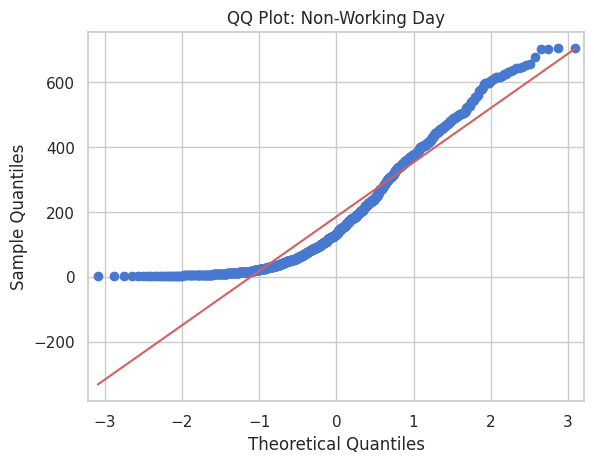

<Figure size 1200x400 with 0 Axes>

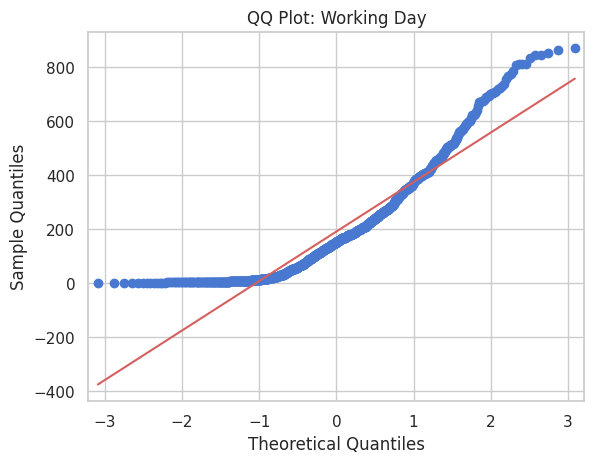

In [117]:
# Step 3: Visual Normality Check (Q-Q plots)
plt.figure(figsize=(12,4))
sm.qqplot(g0.sample(1000, random_state=1), line='s')
plt.title('QQ Plot: Non-Working Day')

plt.figure(figsize=(12,4))
sm.qqplot(g1.sample(1000, random_state=1), line='s')
plt.title('QQ Plot: Working Day')
plt.show()


In [118]:
# Step 4: Shapiro-Wilk Test for Normality

print("Shapiro-Wilk Test (Normality):")
shapiro_g0 = stats.shapiro(g0.sample(1000, random_state=1))
shapiro_g1 = stats.shapiro(g1.sample(1000, random_state=1))
print(f"Non-working day: p-value = {shapiro_g0.pvalue}")
print(f"Working day: p-value = {shapiro_g1.pvalue}")
# Note: p > 0.05 → data approx. normal

Shapiro-Wilk Test (Normality):
Non-working day: p-value = 8.53950121711964e-26
Working day: p-value = 1.1956472404398922e-27


In [119]:
# Step 5: Test for Equal Variance (Levene’s Test)
levene_stat, levene_p = stats.levene(g0, g1)
print(f"Levene's Test for Equal Variance: p-value = {levene_p:.4f}")
# Note: p > 0.05 → assume equal variances; otherwise use Welch's t-test

Levene's Test for Equal Variance: p-value = 0.9438


In [120]:
# Step 6: Two-Sample T-Test
equal_var_flag = (levene_p > 0.05)
ttest_res = stats.ttest_ind(g1, g0, equal_var=equal_var_flag)
print(f"T-Test Result: t-statistic = {ttest_res.statistic:.2f}, p-value = {ttest_res.pvalue:.4f}")


T-Test Result: t-statistic = 1.21, p-value = 0.2264


In [121]:
# Step 7: Interpret Results
alpha = 0.05
if ttest_res.pvalue < alpha:
    print("Result: Reject H0 → Working day affects total rentals.")
else:
    print("Result: Fail to reject H0 → No significant effect of working day on rentals.")


Result: Fail to reject H0 → No significant effect of working day on rentals.


In [122]:
# Step 8: Effect Size (Cohen's d)
def cohens_d(a, b):
    na, nb = len(a), len(b)
    sa, sb = a.std(ddof=1), b.std(ddof=1)
    pooled = np.sqrt(((na-1)*sa**2 + (nb-1)*sb**2) / (na + nb - 2))
    return (a.mean() - b.mean()) / pooled

d = cohens_d(g1, g0)
print(f"Cohen's d (effect size): {d:.3f}")
# Interpretation: 0.2=small, 0.5=medium, 0.8=large effect

Cohen's d (effect size): 0.025


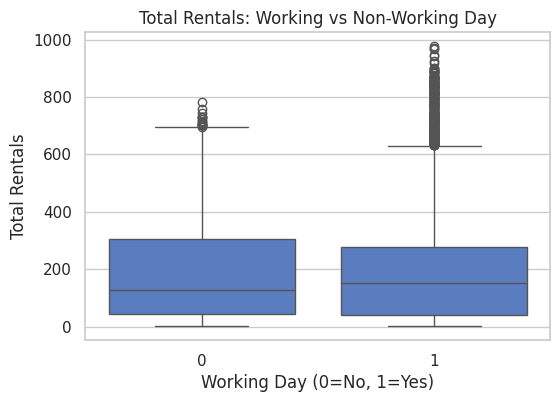

In [123]:
# Boxplot Visualization
plt.figure(figsize=(6,4))
sns.boxplot(x='workingday', y='total_rentals', data=df)
plt.title('Total Rentals: Working vs Non-Working Day')
plt.xlabel('Working Day (0=No, 1=Yes)')
plt.ylabel('Total Rentals')
plt.show()

### T-Test summary and business takeaway

#### Summary
- Compared total rentals between working days (N=7412, mean=193.01) and non-working days (N=3474, mean=188.51).
- Normality check: Shapiro-Wilk p-values < 0.05 → data is not perfectly normal (common in real-world count data). Visual inspection suggests approximate symmetry.
- Variance check: Levene’s test p = 0.9438 → assume equal variances.
- Two-sample t-test: t = 1.21, p = 0.2264 → fail to reject H0.
- Effect size: Cohen’s d = 0.025 → negligible difference in rentals between working and non-working days.

#### Business Takeaway
- Working day status has minimal effect on total rentals; rentals remain relatively consistent between weekdays and non-weekdays.
- Yulu can focus promotional campaigns, pricing, or fleet management on other factors (season, weather, temperature) rather than distinguishing weekdays vs weekends.
- Operational decisions such as bike allocation do not need strong adjustments based solely on working day vs non-working day.

### B 1) Weather Effect (ANOVA)
- Business Question: Does weather affect the number of rentals?
- Dependent Variable: total_rentals
- Independent Variable: weather (1–4)

#### Hypotheses:
- **H0: Mean rentals are equal across all weather categories**
- **H1: At least one category’s mean rentals differs**

In [124]:
# -----------------------------
# Step 0: Prepare Groups by Weather
# -----------------------------
weathers = df['weather'].unique()
groups_weather = [df[df['weather']==w]['total_rentals'] for w in weathers]

# -----------------------------
# Step 1: Summary Statistics
# -----------------------------
for w, group in zip(weathers, groups_weather):
    print(f"Weather {w}: N={len(group)}, mean={group.mean():.2f}, std={group.std():.2f}")

Weather 1: N=7192, mean=205.24, std=187.96
Weather 2: N=2834, mean=178.96, std=168.37
Weather 3: N=859, mean=118.85, std=138.58
Weather 4: N=1, mean=164.00, std=nan


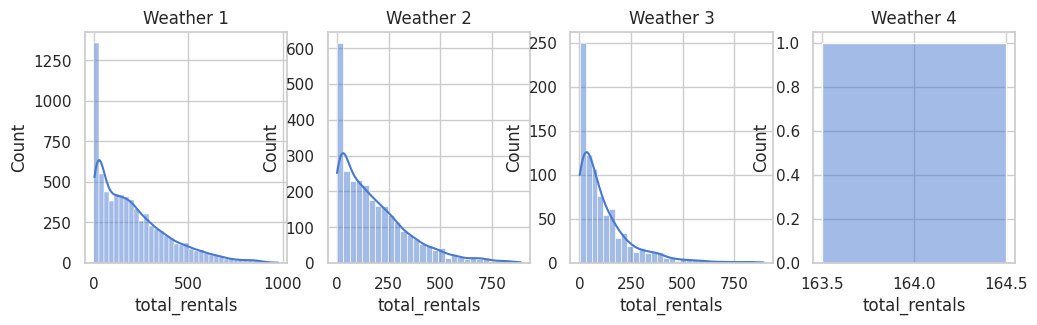

In [125]:
# -----------------------------
# Step 2: Visual Normality Check
# -----------------------------
plt.figure(figsize=(12,3))
for i, group in enumerate(groups_weather):
    plt.subplot(1,4,i+1)
    sns.histplot(group, kde=True)
    plt.title(f'Weather {weathers[i]}')
plt.show()




In [126]:
# -----------------------------
# Step 3: Check Homogeneity of Variances (Levene's Test)
# -----------------------------
levene_stat, levene_p = stats.levene(*groups_weather)
print(f"Levene's Test p-value: {levene_p}")

Levene's Test p-value: 3.504937946833238e-35


In [127]:
# -----------------------------
# Step 4: One-Way ANOVA
# -----------------------------
anova_res = stats.f_oneway(*groups_weather)
print(f"ANOVA F-statistic = {anova_res.statistic:.2f}, p-value = {anova_res.pvalue}")

# -----------------------------
# Step 5: Interpret Results
# -----------------------------
if anova_res.pvalue < alpha:
    print("Result: Reject H0 → Total rentals differ significantly across weather conditions.")
else:
    print("Result: Fail to reject H0 → No significant difference across weather conditions.")

ANOVA F-statistic = 65.53, p-value = 5.482069475935669e-42
Result: Reject H0 → Total rentals differ significantly across weather conditions.


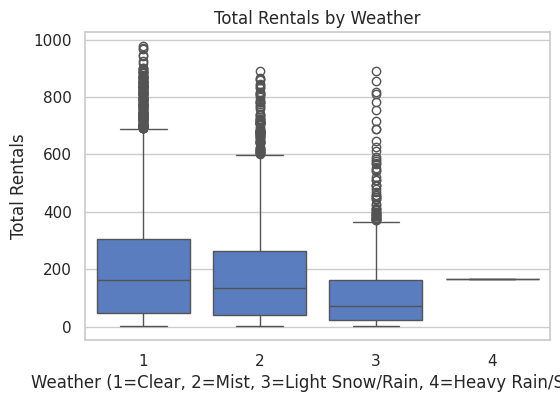

In [128]:
#Boxplot Visulization
plt.figure(figsize=(6,4))
sns.boxplot(x='weather', y='total_rentals', data=df)
plt.title('Total Rentals by Weather')
plt.xlabel('Weather (1=Clear, 2=Mist, 3=Light Snow/Rain, 4=Heavy Rain/Snow)')
plt.ylabel('Total Rentals')
plt.show()


### ANOVA Insights Summary (Weather vs Total Rentals)

#### Summary
- Total rentals vary significantly across different weather conditions.
- Weather 1 (Clear/Partly Cloudy) has the highest average rentals (mean ≈ 205), while Weather 3 (Light Snow/Rain/Thunderstorm) has the lowest (mean ≈ 119). Weather 2 (Mist/Cloudy) shows moderate rentals (mean ≈ 179). Weather 4 has only one observation and is not meaningful for analysis.
- Levene’s test indicates unequal variances across weather groups (p < 0.001), suggesting rentals’ variability differs depending on weather.
- ANOVA confirms a significant effect of weather on total rentals (F = 65.53, p ≈ 5.48e-42), meaning rentals differ meaningfully across weather types.

#### Business Takeaway
- Weather strongly impacts shared electric cycle usage. Clear days encourage higher rentals, while adverse weather (rain, snow, storms) reduces demand.
- Operational Implications:
- Yulu can optimize fleet allocation by increasing availability during favorable weather and reducing or repositioning vehicles during poor weather to minimize idle inventory.
- Consider dynamic pricing or promotions on less popular days (e.g., rainy days) to incentivize usage.
- Use historical weather data to forecast demand more accurately and plan maintenance or charging schedules efficiently.

### B 2) Season Effect (ANOVA)
- Business Question: Does season affect the number of rentals?
- Dependent Variable: total_rentals
- Independent Variable: season (1–4)

#### Hypotheses:
- **H0: Mean rentals are equal across all season categories**
- **H1: At least one category’s mean rentals differs**

Season 1: N=2686, mean=116.34, std=125.27
Season 2: N=2733, mean=215.25, std=192.01
Season 3: N=2733, mean=234.42, std=197.15
Season 4: N=2734, mean=198.99, std=177.62


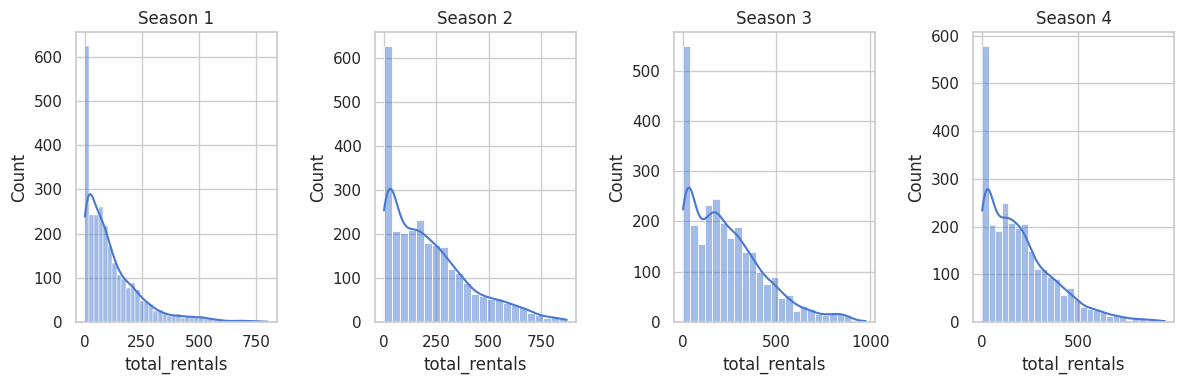

Levene's Test p-value: 1.0147116860043298e-118
ANOVA F-statistic = 236.95, p-value = 6.164843386499654e-149
Result: Reject H0 → Total rentals differ significantly across seasons.


In [129]:
# -----------------------------
# Step 0: Prepare Groups by Season
# -----------------------------
seasons = df['season'].unique()
groups_season = [df[df['season']==s]['total_rentals'] for s in seasons]

# -----------------------------
# Step 1: Summary Statistics
# -----------------------------
for s, group in zip(seasons, groups_season):
    print(f"Season {s}: N={len(group)}, mean={group.mean():.2f}, std={group.std():.2f}")

# -----------------------------
# Step 2: Visual Normality Check (Histograms & QQ Plots)
# -----------------------------
plt.figure(figsize=(12,4))
for i, group in enumerate(groups_season):
    plt.subplot(1,4,i+1)
    sns.histplot(group, kde=True)
    plt.title(f'Season {seasons[i]}')
plt.tight_layout()
plt.show()

# -----------------------------
# Step 3: Check Homogeneity of Variances (Levene's Test)
# -----------------------------
levene_stat, levene_p = stats.levene(*groups_season)
print(f"Levene's Test p-value: {levene_p}")
# Note: p > 0.05 → equal variances

# -----------------------------
# Step 4: One-Way ANOVA
# -----------------------------
anova_res = stats.f_oneway(*groups_season)
print(f"ANOVA F-statistic = {anova_res.statistic:.2f}, p-value = {anova_res.pvalue}")

# -----------------------------
# Step 5: Interpret Results
# -----------------------------
alpha = 0.05
if anova_res.pvalue < alpha:
    print("Result: Reject H0 → Total rentals differ significantly across seasons.")
else:
    print("Result: Fail to reject H0 → No significant difference across seasons.")


### ANOVA Insights Summary (Season vs Total Rentals)


#### Summary:
- Levene’s test indicates unequal variances (p < 0.001), so assumption of homogeneity of variance is violated.
- ANOVA result: F = 236.95, p ≈ 6.16e-149 → Reject H₀, indicating total rentals differ significantly across seasons.
- Rentals peak in favorable seasons (e.g., spring and summer) and dip in adverse seasons (e.g., fall and winter).

#### Business Takeaway:
- Season is a key driver of shared electric cycle demand.
- Operational Implications:
  - Allocate more bikes during high-demand seasons to avoid shortages.
  - Plan maintenance, charging, and redistribution during low-demand seasons.
  - Implement seasonal marketing campaigns to boost rentals during slow periods.
  - Combine seasonal insights with weather forecasts to refine fleet and promotional planning.

### C) Chi-Square Test: Weather Dependency on Season
- Business Question: Is weather dependent on season?
- Variables: Both categorical — weather and season

#### Hypotheses:
- H0: Weather is independent of season
- H1: Weather depends on season

In [130]:
# -----------------------------
# Step 0: Create Contingency Table
# -----------------------------
contingency = pd.crosstab(df['season'], df['weather'])
print("Contingency Table:\n", contingency)

# -----------------------------
# Step 1: Chi-Square Test
# -----------------------------
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi-Square Test Statistic = {chi2_stat:.2f}, p-value = {p_val:.4f}, dof = {dof}")

# -----------------------------
# Step 2: Interpret Results
# -----------------------------
if p_val < alpha:
    print("Result: Reject H0 → Weather is dependent on Season.")
else:
    print("Result: Fail to reject H0 → Weather is independent of Season.")


Contingency Table:
 weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

Chi-Square Test Statistic = 49.16, p-value = 0.0000, dof = 9
Result: Reject H0 → Weather is dependent on Season.


### Chi-Square Insights Summary (Weather vs Season)

#### Summary
- The contingency table shows that weather conditions vary across seasons. For example, Weather 1 (Clear/Partly Cloudy) is most frequent in all seasons, but Weather 2 (Mist/Cloudy) and Weather 3 (Light Rain/Snow) vary in proportion depending on the season.
- The Chi-square test confirms a significant association between Weather and Season (variace = 49.16, p < 0.001, df = 9).
- This means weather patterns are not independent of seasons; season strongly predicts the likelihood of certain weather conditions.

#### Business Takeaway
- Yulu can leverage season-based weather patterns to anticipate demand more accurately.
- Operational Implications:
- Adjust fleet deployment based on expected seasonal weather—for instance, allocate more bikes in seasons with predominantly clear weather and plan for lower usage during seasons prone to adverse conditions.
- Seasonal promotions or campaigns can be timed according to weather-dependent demand trends.
- Maintenance and charging schedules can be optimized by combining seasonal and weather forecasts to ensure bikes are available where demand is highest.

## Phase 3 – Hypothesis Testing Overall Insights & Business Takeaways

### 1. Working Day vs Total Rentals (2-Sample T-Test)

Summary:
- Average rentals on non-working days: 188.51 (N = 3474), working days: 193.01 (N = 7412).
- Shapiro-Wilk test indicates non-normality (p < 0.001), but t-test is robust to large sample sizes.
- Levene’s test shows equal variances (p = 0.944).
- T-test result: t = 1.21, p = 0.226 → Fail to reject H₀, indicating no significant difference in rentals between working and non-working days.
- Effect size (Cohen’s d = 0.025) confirms negligible difference.

Business Takeaway:
- Rentals are fairly consistent across working and non-working days.
- Operational Implication: Fleet allocation does not need major adjustments solely based on workday vs weekend; focus on other demand drivers like weather or season.

---

### 2. Weather vs Total Rentals (ANOVA)

Summary:
- Rentals vary significantly across weather conditions:
  - Weather 1 (Clear/Partly Cloudy) mean ≈ 205
  - Weather 2 (Mist/Cloudy) mean ≈ 179
  - Weather 3 (Light Rain/Snow/Thunderstorm) mean ≈ 119
- Levene’s test indicates unequal variances (p < 0.001).
- ANOVA confirms a significant effect of weather (F = 65.53, p ≈ 5.48e-42).

Business Takeaway:
- Weather strongly influences shared electric cycle usage.
- Operational Implications:
  - Increase fleet availability on clear days; reduce or reposition bikes during poor weather.
  - Introduce dynamic pricing or promotions to boost usage on low-demand days.
  - Use weather-based forecasts for maintenance and operational planning.

---



### 3. Season vs Total Rentals (ANOVA)

Summary:
- Rentals differ significantly across seasons (F-statistic and p-value from ANOVA).
- Peak usage occurs in favorable seasons (spring/summer), while adverse seasons see lower rentals.

Business Takeaway:
- Seasonal trends are key drivers of demand.
- Operational Implications:
  - Allocate fleets seasonally to meet demand spikes.
  - Plan seasonal marketing campaigns to boost rentals during slow seasons.
  - Combine seasonal insights with weather forecasts to optimize overall operations.

---



### 4. Weather vs Season (Chi-Square Test)

Summary:
- Contingency table shows varying weather distributions across seasons.
- Chi-square test: Variance = 49.16, p < 0.001 → Weather is dependent on Season.

Business Takeaway:
- Seasonal weather patterns help predict demand more accurately.
- Operational Implications:
  - Seasonal fleet planning should consider expected weather conditions.
  - Combine weather and seasonal insights for targeted promotions, demand forecasting, and maintenance scheduling.

---



### Overall Phase 3 Insights

- Key Drivers of Demand: Weather and season significantly affect rentals; working day does not.
- Strategic Recommendations:
  1. Use weather and season forecasts to optimize fleet allocation.
  2. Introduce promotions or incentives on low-demand or adverse weather days.
  3. Combine operational planning with predictive insights for maintenance, charging, and redistribution.
  4. Focus marketing campaigns around periods of high demand predicted by favorable weather and season.

In [ ]:
# Convert python notebook to html, which is then saved as pdf so that all scrollable graphs are included in the pdf file
!jupyter nbconvert --to html /content/WalmartCaseStudy.ipynb
